# Unit 9 Week 3 Submission

### Hi! Welcome to my second submission on Github! 

In this submission, we will complete the Unit 9 Week 3 assignment of the IBM Data Science Professional Certification.

### Part 1

<b>Objective </b>: The objective of this assignment is to extract a table from Wikipedia as a dataframe in python and clean the dataframe. 

I will be using "Beautiful soup" to extract the table from the webpage by following this tutorial:https://simpleanalytical.com/how-to-web-scrape-wikipedia-python-urllib-beautiful-soup-pandas


In [185]:
import warnings
warnings. filterwarnings('ignore')

In [186]:
# import the library we use to open URLs
import urllib.request

In [187]:
# specify which URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [188]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [189]:
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

In [190]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [191]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")

In [192]:
#we're going to use the class "wikitable sortable" since that contains are actual table and retrieve only this table
#and store it in a variable called "right_table"
right_table=soup.find('table', class_='wikitable sortable')

In [193]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    #print(len(cells))
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

Now that we have extracted our table from the Wikipedia page. Let's store in as a dataframe using pandas.

In [194]:
import pandas as pd

df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [195]:
#Let's clean the columns since it is text data

for col in df.columns:
    df[col]=df[col].apply(lambda x: x.strip())

In [196]:
df['Borough'].value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
York                 5
East York            5
Mississauga          1
Name: Borough, dtype: int64

Now that the data is clean we can work with it to filter out the required rows

The <b>first criteria</b> was- "Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned."

In [197]:
df1=df[df['Borough']!='Not assigned']
df1['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East Toronto         5
East York            5
Mississauga          1
Name: Borough, dtype: int64

Okay now we've removed rows where "Borough" is "Not assigned". Now let's look at the next criteria.

The <b>second criteria</b> is: "More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table."

In [198]:
#Let's check which Postal Codes are repeated more than once

#If the postal codes are repeated more than once, we will combine them in one row as mentioned in the criteria

pc=pd.DataFrame(df1['PostalCode'].value_counts())
pc.reset_index(inplace=True)
pc.rename(columns={'index':'PostalCode','PostalCode':'Count'},inplace=True)
pc[pc['Count']!=1]

,PostalCode,Count


There seems to be no Postal Code that is repeated twice and hence this step is already done.

The <b>third criteria</b> is: "If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough."

In [199]:
df1[df1['Neighborhood']=='Not assigned']

,PostalCode,Borough,Neighborhood


There seems to be no "Not assigned" values in the "Neighborhood" column because we dropped the rows where the "Borough" column was "Not assigned". Turns out wherever the "Borough" was not assigned, the "Neighborhood" was not assigned as well. You can check the Wikipedia page again to confirm it. I've attached a screenshot of a few rows.

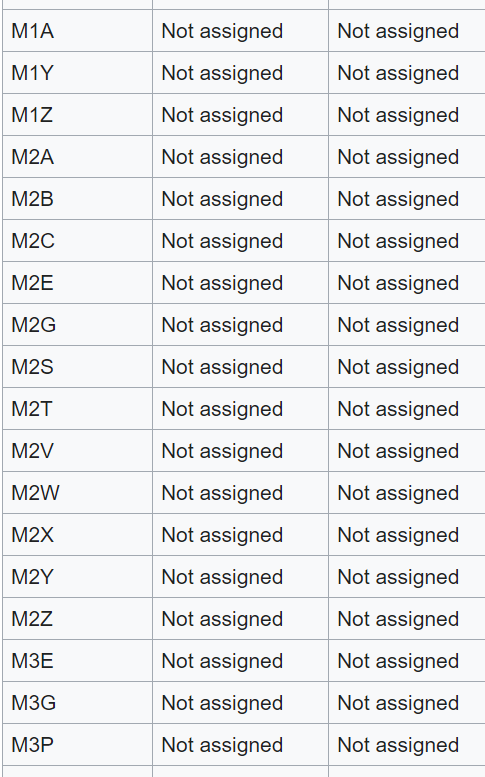

In [200]:
#I have written the below code just to illustrate what could have been done in case we had "Not assigned" values in the "Neighborhood" column
df_fake={'Neighborhood':['Not assigned','Bank Street','Not assigned'],'Borough':['CV1','CV2','CV3']}
df_fake=pd.DataFrame(df_fake)
print("Sample DF before applying criteria:\n")
print(df_fake)
print('\n')
dummy=df_fake[df_fake["Neighborhood"]=="Not assigned"]
dummy['Neighborhood']=dummy['Borough']
df_fake1=df_fake[df_fake["Neighborhood"]!="Not assigned"]
df_fake3=pd.concat([dummy,df_fake1],axis=0)
print("Sample DF after applying criteria:")
df_fake3

Sample DF before applying criteria:

   Neighborhood Borough
0  Not assigned     CV1
1   Bank Street     CV2
2  Not assigned     CV3


Sample DF after applying criteria:


,Neighborhood,Borough
0,CV1,CV1
2,CV3,CV3
1,Bank Street,CV2


Let's print our final dataframe once again.

### Final DataFrame:

In [201]:
df1.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Now let's go to our last criteria: "In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe."

In [202]:
df1.shape

(103, 3)

### Part 2

In [203]:
!pip install geocoder

In [204]:
'''
This cell is taking a very long time to run and the kernel stops working hence we won't be using geocoder to get the lattitude and longitude data
import geocoder # import geocoder
postal_code='M5G'

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
'''

"\nThis cell is taking a very long time to run and the kernel stops working hence we won't be using geocoder to get the lattitude and longitude data\nimport geocoder # import geocoder\npostal_code='M5G'\n\n# initialize your variable to None\nlat_lng_coords = None\n\n# loop until you get the coordinates\nwhile(lat_lng_coords is None):\n  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))\n  lat_lng_coords = g.latlng\n\nlatitude = lat_lng_coords[0]\nlongitude = lat_lng_coords[1]\n"

In [205]:
#In case the geocoder thing doesn't work
geodata=pd.read_csv("https://cocl.us/Geospatial_data")
geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [206]:
#Let's merge the dataframes based on "Postal Code" column
geodata.rename(columns={'Postal Code':'PostalCode'},inplace=True)
df_geo = df1.merge(geodata, on='PostalCode')
df_geo.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### Part 3

In [207]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [208]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [209]:
!pip install folium

In [210]:
import folium # map rendering library

In [211]:
#Create a base map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

In [212]:
# add markers to map
for lat, lng, borough, neighborhood in zip(df_geo['Latitude'], df_geo['Longitude'], df_geo['Borough'], df_geo['Neighborhood']): #going through each column simultaneously
    label = '{}, {}'.format(neighborhood, borough) #storing only neighborhood and borough in variable "label"
    label = folium.Popup(label, parse_html=True) #we're adding a label here so that when you click on the datapoint it will show the neighborhood,borough as a popup
    #The parameters for the function are : folium.CircleMarker(location, radius=10, popup=None, tooltip=None, **kwargs)
    folium.CircleMarker(
        [lat, lng], #location
        radius=5, #radius
        popup=label, #popup
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto
    

<b>Let's only work with the boroughs that contain the word "Toronto"</b>

In [213]:
df_Toronto=df_geo[df_geo['Borough'].str.contains("Toronto")]
df_Toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


Let's repeat the above steps to visualize the map of Toronto with the above markers

In [214]:
map_toronto2=folium.Map(location=[latitude,longitude],zoom_start=12)

for lat,long,ngh,br in zip(df_Toronto['Latitude'],df_Toronto['Longitude'],df_Toronto['Neighborhood'],df_Toronto['Borough']):
    label='{} , {}'.format(ngh,br)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,long],
    radius=5,
    popup=label,
    fill=True,
    color='blue',
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False
    ).add_to(map_toronto2)
    
map_toronto2

Define FourSqaure credentials 

In [215]:
CLIENT_ID = 'W2BHJHUPIJWUXWBCO2LI1ENARDIB4C31IIXVA1PFMDDWBCR5' # your Foursquare ID
CLIENT_SECRET = '5CKJUCXJDT54SYSEZDICOPL1JTVKBRPESCQMLX0AEAHR1AUP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W2BHJHUPIJWUXWBCO2LI1ENARDIB4C31IIXVA1PFMDDWBCR5
CLIENT_SECRET:5CKJUCXJDT54SYSEZDICOPL1JTVKBRPESCQMLX0AEAHR1AUP


In [216]:
neighborhood_name = df_Toronto.iloc[4, 2]
print("One of the neighborhood's name is:", neighborhood_name)

One of the neighborhood's name is: The Beaches


Get the neighborhood's latitude and longitude

In [217]:
neighborhood_latitude = df_Toronto.iloc[4, 3] # neighborhood latitude value
neighborhood_longitude = df_Toronto.iloc[4, 4] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


Let's get the top 100 venues that are in <b>The Beaches</b> within a radius of 500 meters.

In [218]:
import requests
import json
!pip install flatten_json
from flatten_json import flatten

In [219]:
LIMIT=100
radius=500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results=requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5eda7f9b7828ae001bd6f82d'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

It's very difficult to understand anything from the above json file. Let's view our json file using the flatten() function. View it here - https://github.com/amirziai/flatten#usage-with-pandas. It will help us read the json file much more easily.

In [220]:
flatten(results)

{'meta_code': 200,
 'meta_requestId': '5eda7f9b7828ae001bd6f82d',
 'response_headerLocation': 'The Beaches',
 'response_headerFullLocation': 'The Beaches, Toronto',
 'response_headerLocationGranularity': 'neighborhood',
 'response_totalResults': 4,
 'response_suggestedBounds_ne_lat': 43.680857404499996,
 'response_suggestedBounds_ne_lng': -79.28682091449052,
 'response_suggestedBounds_sw_lat': 43.67185739549999,
 'response_suggestedBounds_sw_lng': -79.29924148550948,
 'response_groups_0_type': 'Recommended Places',
 'response_groups_0_name': 'recommended',
 'response_groups_0_items_0_reasons_count': 0,
 'response_groups_0_items_0_reasons_items_0_summary': 'This spot is popular',
 'response_groups_0_items_0_reasons_items_0_type': 'general',
 'response_groups_0_items_0_reasons_items_0_reasonName': 'globalInteractionReason',
 'response_groups_0_items_0_venue_id': '4bd461bc77b29c74a07d9282',
 'response_groups_0_items_0_venue_name': 'Glen Manor Ravine',
 'response_groups_0_items_0_venue_loc

In [221]:
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

In [222]:
def get_category_type(row):
    try:
        categories_list = row['categories']
        print(row['categories'])
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name'] 
    #Each cell in venue.categories is a list of dictionaries. The length of the list is 1 which means there is only 1 element. 
    #[{'id': '4bf58dd8d48988d159941735', 'name': 'Trail', 'pluralName': 'Trails', 'shortName': 'Trail', 
    #'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_', 'suffix': '.png'}, 'primary': True}]
    #That is how a cell in venue.categories looks like. We need to extract the "value" of the "key" "name" i.e in this case
    #we need to extract 'Trail' which we can do by saying categories_list[0] to access the first and only element in the list
    # and then categories_list[0]['name'] to acess the first element of the list and then access the value of the key 'name'

We could see from our flatten() function that the data is store in response_groups_0 and keeps iterating through different values of items from index 0 to 3.

In [223]:
json_normalize(results['response']['groups'][0]['items'])

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bd461bc77b29c74a07d9282-0,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",4bd461bc77b29c74a07d9282,Glen Manor,CA,Toronto,Canada,Queen St.,...,"[Glen Manor (Queen St.), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67682094413784...",43.676821,-79.293942,NaN,ON,Glen Manor Ravine,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ad4c062f964a52011f820e3-1,"[{'id': '50aa9e744b90af0d42d5de0e', 'name': 'H...",4ad4c062f964a52011f820e3,125 Southwood Dr,CA,Toronto,Canada,NaN,...,"[125 Southwood Dr, Toronto ON M4E 0B8, Canada]","[{'label': 'display', 'lat': 43.678879, 'lng':...",43.678879,-79.297734,M4E 0B8,ON,The Big Carrot Natural Food Market,0,[],75150878
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b8daea1f964a520480833e3-2,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",4b8daea1f964a520480833e3,676 Kingston Rd.,CA,Toronto,Canada,at Main St.,...,"[676 Kingston Rd. (at Main St.), Toronto ON M4...","[{'label': 'display', 'lat': 43.67918143494101...",43.679181,-79.297215,M4E 1R4,ON,Grover Pub and Grub,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4df91c4bae60f95f82229ad5-3,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",4df91c4bae60f95f82229ad5,NaN,CA,Toronto,Canada,NaN,...,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.68056321147582...",43.680563,-79.292869,NaN,ON,Upper Beaches,0,[],NaN


Let's store the actual data in a variable called "venues" and
1. Select only name,categories, latitude and longitude columns
2. Extract the category name from the venue.categories column using the "name" key
3. Clean column names from venue.name to name

In [224]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

#print(nearby_venues['venue.categories'])

print(nearby_venues)
# cleaning the columns name i.e changing venue.name to name and so on
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

                           venue.name   venue.categories  venue.location.lat  \
0                   Glen Manor Ravine              Trail           43.676821   
1  The Big Carrot Natural Food Market  Health Food Store           43.678879   
2                 Grover Pub and Grub                Pub           43.679181   
3                       Upper Beaches       Neighborhood           43.680563   

   venue.location.lng  
0          -79.293942  
1          -79.297734  
2          -79.297215  
3          -79.292869  


,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


Let's create a function to repeat it for all the neighborhoods in toronto

In [225]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues

In [226]:
toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Let's check how many venues were returned for each neighborhood

In [227]:
toronto_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,54,54,54,54,54,54
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",19,19,19,19,19,19
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,63,63,63,63,63,63
Christie,17,17,17,17,17,17
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


In [228]:
print("There are {} unique venue categories.".format(toronto_venues['Venue Category'].nunique()))

There are 236 unique venue categories.


<b> Let's analyze each neighborhood </b>

In [229]:
# one hot encoding
toronto_denc_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="",prefix_sep="")

# add neighborhood column back to dataframe
toronto_denc_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_denc_onehot.columns[-1]] + list(toronto_denc_onehot.columns[:-1])
toronto_denc_onehot = toronto_denc_onehot[fixed_columns]

toronto_denc_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [230]:
toronto_denc_grouped = toronto_denc_onehot.groupby('Neighborhood').mean().reset_index()
toronto_denc_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.018519,0.0,0.0,0.000000,0.0,0.0,0.0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,"Business reply mail Processing Centre, South C...",0.052632,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.0625,0.0625,0.125,0.1875,0.125,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,Central Bay Street,0.015873,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.015873,0.0,0.0,0.015873,0.0,0.0,0.0


In [231]:
import numpy as np

Check the 10 most common venues in each neighborhood.

In [232]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_denc_grouped['Neighborhood']

for ind in np.arange(toronto_denc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_denc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Beer Bar,Cheese Shop,Café,Restaurant,Japanese Restaurant,Beach
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Furniture / Home Store,Burrito Place,Restaurant,Italian Restaurant,Stadium,Intersection
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Gym / Fitness Center,Garden,Restaurant,Recording Studio,Pizza Place,Park,Garden Center,Fast Food Restaurant,Spa
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Airport,Airport Food Court,Harbor / Marina,Boutique,Bar,Boat or Ferry
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Department Store,Modern European Restaurant


Now let's cluster the neighborhoods into 5 clusters

In [233]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [234]:
toronto_denc_grouped_clustering.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0.000000,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.018519,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.052632,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.0625,0.0625,0.125,0.1875,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.015873,0.0,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.015873,0.0,0.0,0.015873,0.0,0.0,0.0


In [235]:
# set number of clusters
kclusters = 5

toronto_denc_grouped_clustering = toronto_denc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_denc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [238]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_denc_merged = df_Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_denc_merged = toronto_denc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_denc_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Gym / Fitness Center,Event Space,Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3,Coffee Shop,Sushi Restaurant,Yoga Studio,Restaurant,Discount Store,Italian Restaurant,Smoothie Shop,Bar,Bank,Mexican Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Clothing Store,Coffee Shop,Italian Restaurant,Café,Cosmetics Shop,Japanese Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Diner,Bakery
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Coffee Shop,Café,Cocktail Bar,Restaurant,Gastropub,American Restaurant,Lingerie Store,Gym,Clothing Store,Theater
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Doner Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Women's Store


Let's visualize the resulting clusters

In [239]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        toronto_denc_merged['Latitude'], 
        toronto_denc_merged['Longitude'], 
        toronto_denc_merged['Neighborhood'], 
        toronto_denc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finally, let's examine each cluster

In [240]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 0, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,East Toronto,0,Trail,Health Food Store,Pub,Doner Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
86,Central Toronto,0,Pub,Coffee Shop,Sports Bar,Light Rail Station,Supermarket,Vietnamese Restaurant,Liquor Store,Sushi Restaurant,Bank,American Restaurant


In [241]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 1, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Central Toronto,1,Park,Bus Line,Swim School,Women's Store,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [242]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 2, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Central Toronto,2,Park,Jewelry Store,Trail,Sushi Restaurant,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
91,Downtown Toronto,2,Park,Playground,Trail,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [243]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 3, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,3,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Gym / Fitness Center,Event Space,Restaurant
4,Downtown Toronto,3,Coffee Shop,Sushi Restaurant,Yoga Studio,Restaurant,Discount Store,Italian Restaurant,Smoothie Shop,Bar,Bank,Mexican Restaurant
9,Downtown Toronto,3,Clothing Store,Coffee Shop,Italian Restaurant,Café,Cosmetics Shop,Japanese Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Diner,Bakery
15,Downtown Toronto,3,Coffee Shop,Café,Cocktail Bar,Restaurant,Gastropub,American Restaurant,Lingerie Store,Gym,Clothing Store,Theater
20,Downtown Toronto,3,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Beer Bar,Cheese Shop,Café,Restaurant,Japanese Restaurant,Beach
24,Downtown Toronto,3,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Department Store,Modern European Restaurant
25,Downtown Toronto,3,Grocery Store,Café,Park,Baby Store,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Diner,Candy Store
30,Downtown Toronto,3,Coffee Shop,Café,Restaurant,Thai Restaurant,Gym,Clothing Store,Hotel,Deli / Bodega,Sushi Restaurant,Steakhouse
31,West Toronto,3,Bakery,Pharmacy,Middle Eastern Restaurant,Pet Store,Supermarket,Bar,Café,Portuguese Restaurant,Bank,Music Venue
36,Downtown Toronto,3,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Brewery,Fried Chicken Joint,Restaurant,Scenic Lookout,Sporting Goods Shop


In [244]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 4, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,Central Toronto,4,Gym,Restaurant,Trail,Summer Camp,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
